### Random Forest Classifer
- Random Forest is an ensemble learning algorithm that builds multiple decision trees and outputs the majority class for classification tasks.

- It reduces overfitting by averaging (voting) many decision trees trained on random subsets of data and features.

- It handles both numerical and categorical data without much preprocessing.

- Random Forest is robust to noise and outliers and can handle missing data effectively.

- It provides estimates of feature importance, useful for feature selection and interpretability.

- The model is highly accurate and versatile, suitable for a wide range of classification problems.

- It requires tuning of hyperparameters like number of trees, max depth, and max features for optimal performance.

- Random Forest can be computationally expensive and memory intensive when using many trees or large datasets.

- Predictions can be slower compared to simpler models because each input is evaluated by many trees.

- Interpretability is lower than single decision trees, often considered a "black-box" model.

- It is suitable when accuracy and robustness are prioritized over interpretability and speed.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

Load Full Dataset

In [ ]:
df = pd.read_csv("C:/Users/dinesh/Documents/Infosys Springboard/Dataset/Cleaned_Data/cleaned_us_accidents.csv")
df.head()

,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,Distance(mi),City,County,State,Zipcode,...,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight
0,2,NaN,NaN,38.781024,-121.265820,0.045,Roseville,Placer,Ca,95678-1907,...,False,False,False,False,True,False,False,False,Day,Day
1,2,2021-02-04 12:48:21,2021-02-04 16:51:15,42.448910,-93.721138,7.770,Webster City,Hamilton,Ia,50595,...,False,False,False,False,False,False,False,False,Day,Day
2,2,2022-06-23 10:57:30,2022-06-23 15:43:00,38.858169,-77.219815,1.829,Falls Church,Fairfax County,Va,22042,...,False,False,False,False,False,False,False,False,Day,Day
3,2,NaN,NaN,37.636405,-122.087711,0.666,Hayward,Alameda,Ca,94544,...,False,False,False,False,False,False,False,False,Day,Day
4,2,2022-04-27 15:47:00,2022-04-27 17:26:03,32.991182,-117.210233,0.076,Rancho Santa Fe,San Diego,Ca,92091,...,False,False,False,False,False,False,False,False,Day,Day


Prepare Features & Target

In [6]:
target = 'Severity'
X = df.drop(columns=[target])
y = df[target]

Optimize Data Types

In [ ]:
# Convert int64 → int32, float64 → float32
for col in X.select_dtypes(include=['int64']).columns:
    X[col] = X[col].astype('int32')
for col in X.select_dtypes(include=['float64']).columns:
    X[col] = X[col].astype('float32')

Separate Column Types

In [8]:
categorical_cols = X.select_dtypes(include=['object']).columns.tolist()
numerical_cols = X.select_dtypes(include=['int32', 'float32', 'bool']).columns.tolist()

# Drop very high-cardinality categorical columns
high_card_cols = [c for c in categorical_cols if X[c].nunique() > 50]
categorical_cols = [c for c in categorical_cols if c not in high_card_cols]

Preprocessing Pipelines

In [9]:
numeric_transformer = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler(with_mean=False))  # keep sparse compatibility
])
categorical_transformer = Pipeline([
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=True))
])

preprocessor = ColumnTransformer([
    ('num', numeric_transformer, numerical_cols),
    ('cat', categorical_transformer, categorical_cols)
], sparse_threshold=0.3)  # keep sparse matrices

Random Forest (Memory-Efficient)

In [10]:
clf = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(
        random_state=42,
        n_estimators=50,     # lower to save memory
        max_depth=15,        # restrict tree depth
        min_samples_leaf=5,  # prevents deep branching
        n_jobs=-1
    ))
])

Split & Train

In [11]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("Training started on full dataset (1M rows)...")

clf.fit(X_train, y_train)

Training started on full dataset (1M rows)...


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler(with_mean=False))]),
                                                  ['Start_Lat', 'Start_Lng',
                                                   'Distance(mi)',
                                                   'Temperature(F)',
                                                   'Wind_Chill(F)',
                                                   'Humidity(%)',
                                                   'Pressure(in)',
                                                   'Visibility(mi)',
                                                   'Wind_Speed(mph)',
                                                   'Precipitation(in)',
                                                   'Amenity', 'Bump'...
                                                   'Traffic_Signal',
                                                   'Turning_Loop']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='constant')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['State', 'Wind_Direction',
                                                   'Sunrise_Sunset',
                                                   'Civil_Twilight'])])),
                ('classifier',
                 RandomForestClassifier(max_depth=15, min_samples_leaf=5,
                                        n_estimators=50, n_jobs=-1,
                                        random_state=42))])

Evaluate

In [12]:
y_pred = clf.predict(X_test)

print("\nAccuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.8774723300588013


C:\Users\dinesh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\dinesh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\dinesh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classific


Classification Report:
               precision    recall  f1-score   support

           1       0.00      0.00      0.00       111
           2       0.88      1.00      0.93     99632
           3       0.79      0.07      0.13      9306
           4       1.00      0.00      0.00      5064

    accuracy                           0.88    114113
   macro avg       0.67      0.27      0.27    114113
weighted avg       0.88      0.88      0.83    114113


Confusion Matrix:
 [[    0   111     0     0]
 [    0 99457   175     0]
 [    0  8633   673     0]
 [    0  5055     8     1]]


Feature Importances

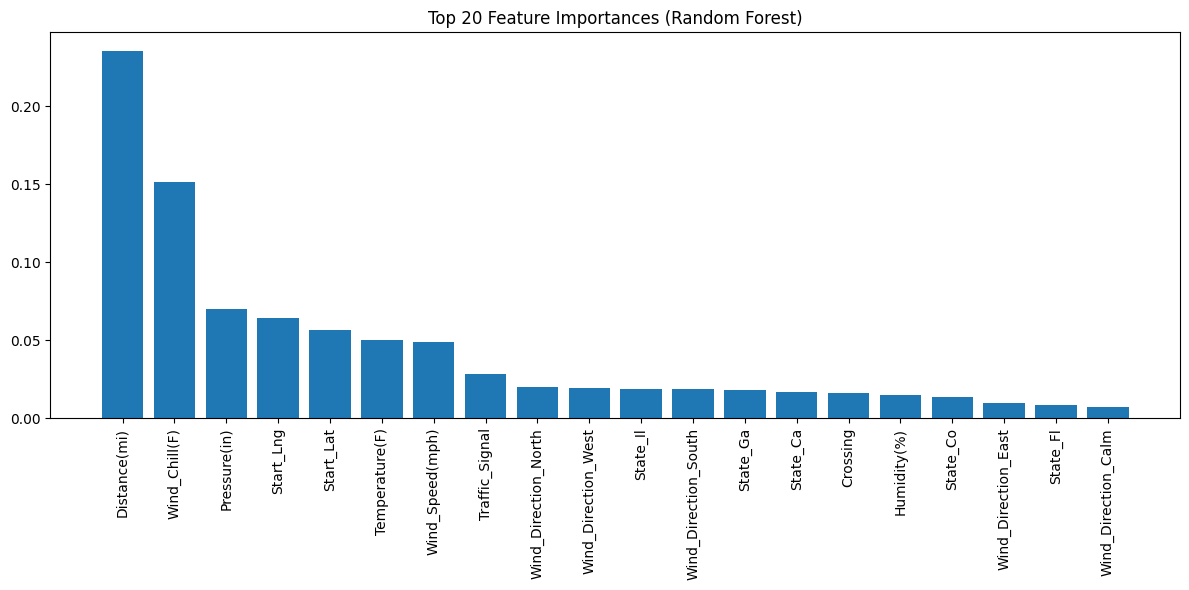

In [13]:
cat_features = clf.named_steps['preprocessor'] \
    .named_transformers_['cat'] \
    .named_steps['onehot'] \
    .get_feature_names_out(categorical_cols)

all_features = np.concatenate([numerical_cols, cat_features])
importances = clf.named_steps['classifier'].feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(12, 6))
plt.title("Top 20 Feature Importances (Random Forest)")
plt.bar(range(20), importances[indices][:20], align='center')
plt.xticks(range(20), all_features[indices][:20], rotation=90)
plt.tight_layout()
plt.show()